In [2]:
#This is the python section of the project
#We will first import the libraries 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Importing warnings as there are deprecated files so they do not appear

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Now we will import the main csv file data

data = pd.read_csv('/Users/soedirakevin/Downloads/Data Wrangling Project/Data Main/SQL-Project.csv') 
#importing the data

In [4]:
#Making sure the data is loaded properly

data.head()

,order_id,product_id,product_category_name,price,payment_type,order_purchase_timestamp
0,25e8ea4e93396b6fa0d3dd708e76c1bd,2028bf1b01cafb2d2b1901fca4083222,perfumaria,56.99,credit_card,2017-12-12 11:19:55
1,1594012ccc1b0770373ce691d697e5ae,b6c312bb8b2e0c3ab0a23d207802f82f,cama_mesa_banho,330.00,credit_card,2018-04-23 19:05:57
2,068176c8a0550b07cddf7e05c8d55319,9328c3a5c42ae7b32d53e419f9b93d66,moveis_decoracao,45.80,boleto,2018-01-13 18:13:53
3,068176c8a0550b07cddf7e05c8d55319,9328c3a5c42ae7b32d53e419f9b93d66,moveis_decoracao,45.80,boleto,2018-01-13 18:13:53
4,1966886b80f14d0588adf6406afb0026,2028bf1b01cafb2d2b1901fca4083222,perfumaria,56.99,debit_card,2017-08-22 16:01:44


In [5]:
#Getting more information on the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  1000 non-null   object 
 1   product_id                1000 non-null   object 
 2   product_category_name     1000 non-null   object 
 3   price                     1000 non-null   float64
 4   payment_type              1000 non-null   object 
 5   order_purchase_timestamp  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [6]:
#Checking null values

data.isnull().sum()

order_id                    0
product_id                  0
product_category_name       0
price                       0
payment_type                0
order_purchase_timestamp    0
dtype: int64

In [7]:
#No null values detected, now checking duplicated

duplicates = data.duplicated(keep=False).sum()
duplicates_percentage = (duplicates / data.count() * 100).round(1)
print(f'number of duplicates: {duplicates}')
print(duplicates_percentage)

number of duplicates: 169
order_id                    16.9
product_id                  16.9
product_category_name       16.9
price                       16.9
payment_type                16.9
order_purchase_timestamp    16.9
dtype: float64


In [8]:
#We need to handle these duplicated data entries

data.drop_duplicates (keep= False, inplace= True)

#Check it again
duplicates = data.duplicated(keep=False).sum()
duplicates_percentage = (duplicates / data.count() * 100).round(1)
print(f'number of duplicates: {duplicates}')
print(duplicates_percentage)

number of duplicates: 0
order_id                    0.0
product_id                  0.0
product_category_name       0.0
price                       0.0
payment_type                0.0
order_purchase_timestamp    0.0
dtype: float64


In [9]:
#In the imported file, the name is in Brazilian Portuguese, we need to translate for ease

data_translate = pd.read_csv('/Users/soedirakevin/Downloads/Data Wrangling Project/Data Main/product_category_name_translation.csv')
print(data_translate)

            product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]


In [10]:
data_translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
portuguese_name = data_translate['product_category_name']
english_name = data_translate['product_category_name_english']

translation = dict(zip(portuguese_name, english_name))
data.replace(translation, inplace=True)
data.head()

,order_id,product_id,product_category_name,price,payment_type,order_purchase_timestamp
0,25e8ea4e93396b6fa0d3dd708e76c1bd,2028bf1b01cafb2d2b1901fca4083222,perfumery,56.99,credit_card,2017-12-12 11:19:55
1,1594012ccc1b0770373ce691d697e5ae,b6c312bb8b2e0c3ab0a23d207802f82f,bed_bath_table,330.00,credit_card,2018-04-23 19:05:57
4,1966886b80f14d0588adf6406afb0026,2028bf1b01cafb2d2b1901fca4083222,perfumery,56.99,debit_card,2017-08-22 16:01:44
5,0f67e615d797da223ac5601b9b08b180,5135301d684848b74276f22afcc6781c,housewares,49.90,credit_card,2018-06-07 17:53:48
6,07a26b88cc90e93f5c9401de11a60793,4d8c2f14df6a1429692e995d787613a5,baby,12.90,credit_card,2018-08-22 12:19:45


In [12]:
#Great, now we can go ahead with the first analysis

In [13]:
#What is the most widely used payment method? We will take a closer look

group_pt = data.groupby('payment_type').payment_type.count().sort_values(ascending=False) 
group_pt.head()

payment_type
credit_card    628
boleto         180
voucher         16
debit_card       7
Name: payment_type, dtype: int64

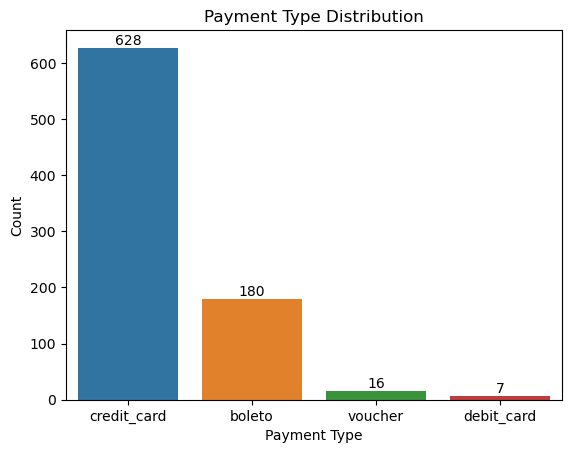

In [14]:
#Let's visualise it a bit more

payment_type_vis = sns.barplot(x=group_pt.index, y=group_pt.values)

plt.title("Payment Type Distribution")
payment_type_vis.set(xlabel="Payment Type", ylabel="Count")

for index, value in enumerate(group_pt.values):
    payment_type_vis.text(index, value, f'{value}', va='bottom', ha='center', fontsize=10, color='black')

plt.show()

In [15]:
#Now let's see the percentage of all payment types relative to the total count

payment_data = {'payment_type': ['credit_card', 'boleto', 'voucher', 'debit_card'],
        'count': [628, 180, 16, 7]}

df = pd.DataFrame(payment_data)

#Calculate and display the percentages for all payment types
total_count = df['count'].sum()

for index, row in df.iterrows():
    payment_type = row['payment_type']
    count = row['count']
    percentage = (count / total_count) * 100
    print(f"{payment_type} payments: {percentage:.2f}%")

credit_card payments: 75.57%
boleto payments: 21.66%
voucher payments: 1.93%
debit_card payments: 0.84%


In [16]:
#We now see credit card is overwhelmingly used at 75% of the time
#Now let's see the top most ordered/purchased product category

group_pn = data.groupby('product_category_name').product_category_name.count().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'health_beauty'),
  Text(1, 0, 'sports_leisure'),
  Text(2, 0, 'furniture_decor'),
  Text(3, 0, 'watches_gifts'),
  Text(4, 0, 'bed_bath_table'),
  Text(5, 0, 'computers_accessories'),
  Text(6, 0, 'housewares'),
  Text(7, 0, 'telephony'),
  Text(8, 0, 'toys'),
  Text(9, 0, 'cool_stuff'),
  Text(10, 0, 'perfumery'),
  Text(11, 0, 'stationery'),
  Text(12, 0, 'baby'),
  Text(13, 0, 'electronics'),
  Text(14, 0, 'auto'),
  Text(15, 0, 'office_furniture'),
  Text(16, 0, 'fashion_bags_accessories'),
  Text(17, 0, 'pet_shop'),
  Text(18, 0, 'garden_tools'),
  Text(19, 0, 'consoles_games'),
  Text(20, 0, 'luggage_accessories'),
  Text(21, 0, 'home_appliances'),
  Text(22, 0, 'musical_instruments'),
  Text(23, 0, 'books_technical'),
  Text(24, 0, 'small_appliances')

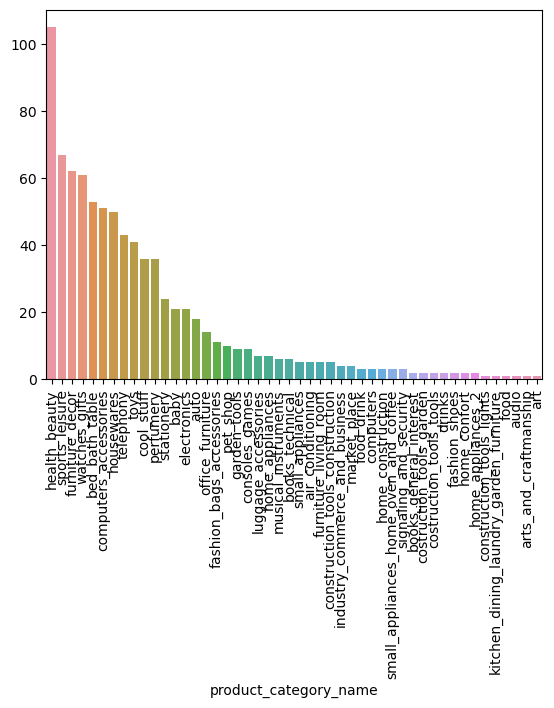

In [17]:
#Visualising it
sns.barplot(x=group_pn.index, y=group_pn.values)
plt.xticks(rotation=90)

In [18]:
#There's too many items to analyse, let's pick the top 10 items

top_10_pn = group_pn.head(10)
print (top_10_pn)

product_category_name
health_beauty            105
sports_leisure            67
furniture_decor           62
watches_gifts             61
bed_bath_table            53
computers_accessories     51
housewares                50
telephony                 43
toys                      41
cool_stuff                36
Name: product_category_name, dtype: int64


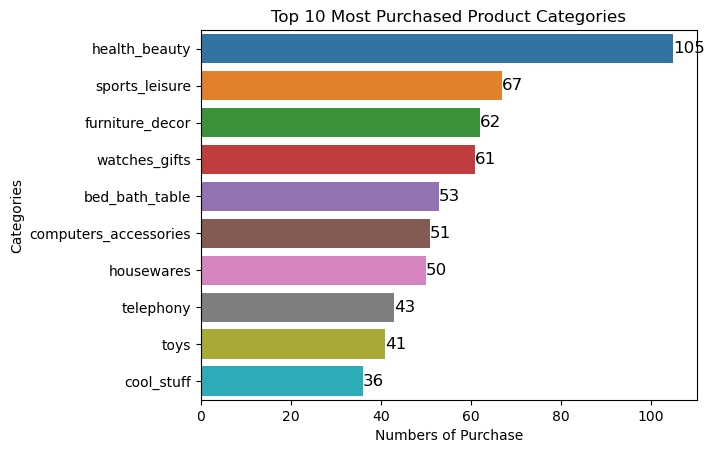

In [19]:
#Visualise it 

top_pn_vis = sns.barplot(x = top_10_pn.values, y = top_10_pn.index)

for index, value in enumerate(top_10_pn.values):
    top_pn_vis.text(value, index, f'{value}', va='center', fontsize=12, color='black')

top_pn_vis.set(ylabel="Categories", xlabel="Numbers of Purchase")
plt.title("Top 10 Most Purchased Product Categories")

plt.show()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

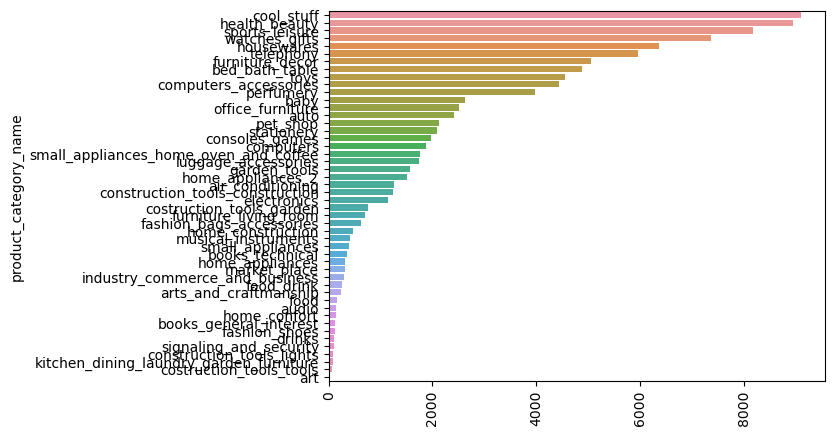

In [20]:
#Great, we can see that health and beauty products are the most ordered

#Wow we want to see the top 10 grossing products

#First we see all the products
group_pg = data.groupby('product_category_name').price.sum().sort_values(ascending=False) 

sns.barplot(x=group_pg.values, y=group_pg.index)
plt.xticks(rotation=90)

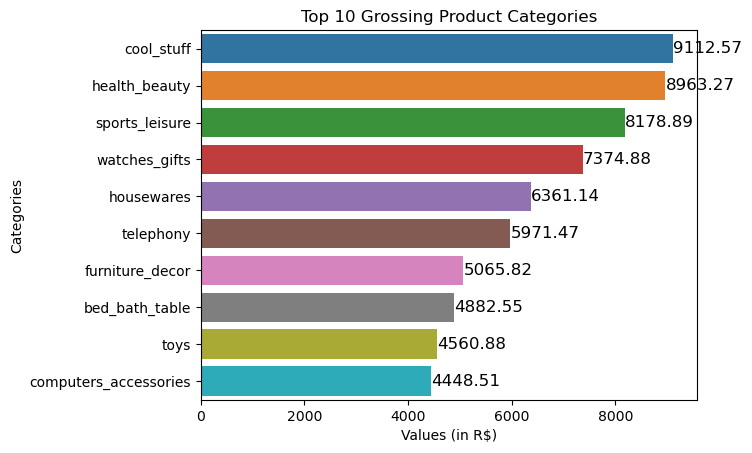

In [22]:
#There's too many, now let's visualise only the top 10 grossing products
top_10_pg = group_pg.head(10)

top_pg_vis = sns.barplot(x=top_10_pg.values, y=top_10_pg.index)

for index, value in enumerate(top_10_pg.values):
    top_pg_vis.text(value, index, f'{value}', va='center', fontsize=12, color='black')

#Set labels and title
top_pg_vis.set(ylabel="Categories", xlabel="Values (in R$)")
plt.title("Top 10 Grossing Product Categories")

plt.show()